GDAL installation: conda install -c conda-forge gdal

Aim:
- get the high resolution images of the kilns
- get the high resolution image of the tiles

In [1]:
import os
import geopandas as gpd
from leafmap import leafmap
from PIL import Image
from glob import glob
import pandas as pd

<Axes: >

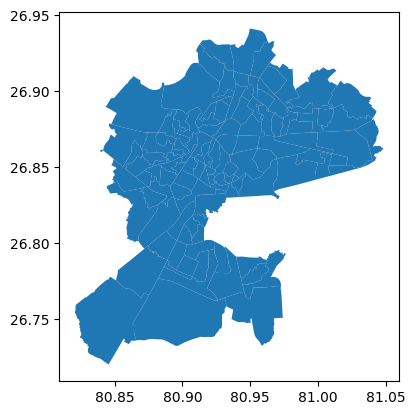

In [2]:
lucknow_shape = gpd.read_file('/home/patel_zeel/kiln_compass_24/raw_shapefiles/LUCKNOW.geojson')
lucknow_shape.plot()

Set the center (lat, lon) of the Map to the center (lat, lon) of the kiln

In [15]:
m=leafmap.Map(center=(28.776028	,78.075289),zoom=20)
m.add_markers(markers = [[28.776447, 78.075846], [28.775610, 78.074732], [28.776028	,78.075289]], radius = 10, color ='red')
m.add_basemap('Google Satellite')
m

bbox contains the (min lon, min lat) and (max lon, max lat) of the corners of the kiln

In [9]:
if m.user_roi is not None:
    bbox = m.user_roi_bounds()
else:
    bbox = [78.075846,28.776447,78.074732,28.775610]

- Tiles are downloaded to generate the kiln image in tiff format.
- When zoom = 20, there is closer view of kiln and 16 tiles cover kiln, hence 16 tiles are downloaded.
- When zoom = 19, there is less closer view of kiln and 6 tiles cover the kiln, hence 6 tiles are downloaded.


When zoom = 20, more pixels are used to view the kiln, image size will be large.
When zoom = 19, lesser pixels are used to view the kiln, image size will be smaller.

REMEMBER: tiles are used to generate the image, tiles will be downloaded and the image will be generated. You are not downloading tiles but downloading it to generate the image.

In [10]:
leafmap.map_tiles_to_geotiff('output.tif',bbox, zoom=19,source='Google Satellite')

Downloaded image 1/6
Downloaded image 2/6
Downloaded image 3/6
Downloaded image 4/6
Downloaded image 5/6
Downloaded image 6/6
Saving GeoTIFF. Please wait...
Image saved to output.tif


In [ ]:
img = Image.open('output.tif')
print(img.size)
img

- Check what coordinates do in metadata.geojson, are these tile corners or something else?

Yes metadata has all corners of the tile.

In [3]:
images_path = glob('/home/rishabh.mondal/Brick-Kilns-project/ijcai_2025_kilns/data/vlm_data/lucknow_airshed_most_15/images/*')
df = gpd.read_file('/home/patel_zeel/kiln_compass_24/data/lucknow_airshed/metadata.geojson')
image_name = os.path.basename(images_path[0])
image_name = image_name.split('.tif')[0]
x, y = map(int, image_name.split('_'))
print(x, y)

tile = df[(df['x'] == x) & (df['y'] == y)]
tile['geometry'] = tile['geometry'].to_crs('EPSG:4326')
tile['geometry']

9021406 3115876


496    POLYGON ((81.02694 26.95143, 81.05440 26.95143...
Name: geometry, dtype: geometry

In [4]:
df.head(5)

,x_idx,y_idx,x,y,geometry
0,3776,15296,8980130,3077352,"POLYGON ((8978601.478 3078881.110, 8981658.959..."
1,3776,14720,8980130,3080104,"POLYGON ((8978601.478 3081632.843, 8981658.959..."
2,3776,14144,8980130,3082855,"POLYGON ((8978601.478 3084384.576, 8981658.959..."
3,3776,13568,8980130,3085607,"POLYGON ((8978601.478 3087136.309, 8981658.959..."
4,6080,13568,8991137,3085607,"POLYGON ((8989608.410 3087136.309, 8992665.891..."


plot one tile and its bottom left and top right corners with center

In [ ]:
lonmin, latmin, lonmax, latmax = tile['geometry'].bounds.values[0]
df = pd.DataFrame({'lat': [latmin, latmax,(latmin+latmax)/2], 'lon': [lonmin, lonmax, (lonmin+lonmax)/2]})
print(df)
# df1 = df[0:1]
# df2 = df[1:2]
# df2.reset_index(drop=True, inplace=True)
# df3 = df[2:]
# df3.reset_index(drop=True, inplace=True)
m = leafmap.Map(center = ((latmin+latmax)/2, (lonmin+lonmax)/2), zoom=20)
m.add_basemap('Google Satellite')
m.add_markers(markers = [[latmin, lonmin], [latmax, lonmax], [(latmin+latmax)/2, (lonmin+lonmax)/2]], shape = 'circle', radius = 10, color = 'red')
m.add_gdf(tile)

# m.add_points_from_xy(df1, x = 'lat', y='lon', icon_colors = 'red') # this covers entire tif file (640*4.77 m = 3052.8 m)
# m.add_points_from_xy(df2, x = 'lat', y='lon', icon_colors = 'blue') # this covers entire tif file (640*4.77)
# m.add_points_from_xy(df3, x = 'lat', y='lon', icon_colors = 'green') # this covers entire tif file (640*4.77)
m

Download high resolution images corresponding to planet images.

In [ ]:
# images_path = glob('/home/rishabh.mondal/Brick-Kilns-project/ijcai_2025_kilns/data/vlm_data/west_bengal_most_15/images/*')
# df = gpd.read_file('/home/patel_zeel/kiln_compass_24/data/west_bengal/metadata.geojson')

# Download M0 images at higher resolution
images_path = glob('/home/patel_zeel/kiln_compass_24/data/m0_obb_without_empty_train/images/*')
df = gpd.read_file('/home/rishabh.mondal/Brick-Kilns-project/ijcai_2025_kilns/sandbox/merged_metadata.geojson')

for image_path in images_path:
    image_name = os.path.basename(image_path)
    image_name = image_name.split('.tif')[0]
    x, y = map(int, image_name.split('_'))
    print(x, y)
    tile = df[(df['x'] == x) & (df['y'] == y)]
    tile['geometry'] = tile['geometry'].to_crs('EPSG:4326')
    x = tile['geometry']
    print(tile['geometry'])
    lonmin, latmin, lonmax, latmax = tile['geometry'].bounds.values[0]

    # midpoint1 = [(latmin+latmax)/2, (lonmin+lonmax)/2]
    # midpoint2 = [(latmin+midpoint1[0])/2, (lonmin+midpoint1[1])/2]
    # midpoint3 = [(latmin+midpoint2[0])/2, (lonmin+midpoint2[1])/2]
    # midpoint4 = [(latmin+midpoint3[0])/2, (lonmin+midpoint3[1])/2]
    # midpoint5 = [(latmin+midpoint4[0])/2, (lonmin+midpoint4[1])/2]
    # midpoint6 = [(latmin+midpoint5[0])/2, (lonmin+midpoint5[1])/2]
    # midpoint7 = [(latmin+midpoint6[0])/2, (lonmin+midpoint6[1])/2]

    bbox = [lonmin, latmin, lonmax, latmax]
    print(bbox)
    # leafmap.map_tiles_to_geotiff(f'./m0/{image_name}.tif',bbox, zoom=17,source='Google Satellite')


8613232 3345187
1828    POLYGON ((77.36025 28.77246, 77.38772 28.77246...
Name: geometry, dtype: geometry
[77.36025093917137, 28.748377754773372, 77.38771675948004, 28.772455371865103]
9007647 3118628
437    POLYGON ((80.90334 26.97347, 80.93081 26.97347...
Name: geometry, dtype: geometry
[80.90334175899177, 26.94898564774338, 80.93080757930045, 26.973466305294423]
8615984 3287401
1481    POLYGON ((77.38497 28.31645, 77.41244 28.31645...
Name: geometry, dtype: geometry
[77.38497017744918, 28.292270079471717, 77.41243599775785, 28.316452120777885]
8632494 3347939
1923    POLYGON ((77.53329 28.79412, 77.56075 28.79412...
Name: geometry, dtype: geometry
[77.5332856071161, 28.770047860078655, 77.56075142742479, 28.79412047786956]
8096212 2629431
96    POLYGON ((72.71578 22.99125, 72.74325 22.99125...
Name: geometry, dtype: geometry
[72.71578072497267, 22.965960407639546, 72.74324654528137, 22.991246834131466]
9032413 3085607
635    POLYGON ((81.12581 26.70879, 81.15328 26.70879...
Name: ge

At zoom = 20, 640*4.77/20480 = 0.1490625 m  Geochat is not accepting images of size 20480

At zoom = 19, 640*4.77/10240 = 0.298125 m

At zoom = 18, 640*4.77/5120 = 0.59625 m

At zoom = 17, 640*4.77/2560 = 1.1925 m

Download the brick kiln images 

- Find the corners of the tiff file, convert into lat-lon
- Find the lat-lon of 30638 kilns lying within the corners of tiff file
- Download these kilns

In [3]:
import pandas as pd
kiln_locations = []
# for state in ["uttar_pradesh", "bihar", "west_bengal", "haryana", "punjab"]:
for state in ["west_bengal"]:
    kiln_locations.append(gpd.read_file(f"/home/patel_zeel/kiln_compass_24/final_data/labels/{state}.geojson").to_crs("EPSG:4326"))
all_kilns_gdf = pd.concat(kiln_locations, ignore_index=True)
# all_kilns_gdf.head(2).T

In [4]:
all_kilns_gdf.head(2)

,class_name,confidence,max_lon,min_lon,max_lat,min_lat,center_lat,center_lon,width_of_box,height_of_box,...,resolution,source,task_name,geo_box,x,y,yolo_label,style,type,geometry
0,Zigzag,0.952256,88.346119,88.345315,23.588611,23.588219,23.588415,88.345717,82.067443,43.418940,...,NaN,Drawn|Azure Maps Satellite,,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((88.34610 23.58822, 88.34612 23.58858..."
1,Zigzag,0.947390,88.554869,88.554090,22.250306,22.249316,22.249811,88.554480,80.232859,109.668076,...,NaN,Drawn|Azure Maps Satellite,,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((88.55409 22.24946, 88.55455 22.24932..."


In [14]:
all_kilns_gdf['width_of_box'].mean(), all_kilns_gdf['height_of_box'].mean(), 89/4.77, 89/1.1925, 89/0.59625
# area covered by kilns is 7985.5477 square meter and our slice is 320 and we need 350 pixel slice for the kiln so we keep an overlap of 30 pixels.

(88.86694858793456,
 89.85959199662938,
 18.658280922431867,
 74.63312368972747,
 149.26624737945494)

In [6]:
from shapely.geometry import Polygon

images_path = glob('/home/rishabh.mondal/Brick-Kilns-project/ijcai_2025_kilns/data/vlm_data/lucknow_airshed_most_15/images/*')
df = gpd.read_file('/home/patel_zeel/kiln_compass_24/data/lucknow_airshed/metadata.geojson')

for image_path in images_path[:1]:
    image_name = os.path.basename(image_path)
    image_name = image_name.split('.tif')[0]
    x, y = map(int, image_name.split('_'))
    print(x, y)
    tile = df[(df['x'] == x) & (df['y'] == y)]
    tile['geometry'] = tile['geometry'].to_crs('EPSG:4326')
    x = tile['geometry']
    # print(tile['geometry'])
    lonmin, latmin, lonmax, latmax = tile['geometry'].bounds.values[0]

    coords = [
    (lonmax, latmin),
    (lonmax, latmax),
    (lonmin, latmax),
    (lonmin, latmin),
    (lonmax, latmin)  # Closing the polygon
    ]

    polygon = Polygon(coords)
    gdf = gpd.GeoDataFrame({"geometry": [polygon]}, crs="EPSG:4326")

    # Convert kiln coordinates to GeoDataFrame
    center_coords = all_kilns_gdf[['center_lat', 'center_lon', 'max_lon', 'min_lon', 'max_lat', 'min_lat']].copy()
    center_coords = gpd.GeoDataFrame(
        center_coords,
        geometry=gpd.points_from_xy(center_coords.center_lon, center_coords.center_lat),
        crs="EPSG:4326"
    )

    # Ensure both have the same CRS
    print("Kiln CRS:", center_coords.crs)
    print("Polygon CRS:", gdf.crs)

    # Perform spatial join to find kilns inside the polygon
    kilns_in_gpd = gpd.sjoin(center_coords, gdf, how='inner')

    # Display the count of kilns inside the polygon
    print("Number of kilns inside polygon:", kilns_in_gpd.shape[0])

    for i, bbox in enumerate(kilns_in_gpd[['min_lon', 'min_lat', 'max_lon', 'max_lat']].values):
        print(bbox)
        leafmap.map_tiles_to_geotiff(f'./lucknow_kilns_zoom19/{image_name}_{i}.tif', list(bbox), zoom=19, source='Google Satellite')


9021406 3115876
Kiln CRS: EPSG:4326
Polygon CRS: EPSG:4326
Number of kilns inside polygon: 11
[81.050812 26.931705 81.051582 26.932519]
Downloaded image 1/6
Downloaded image 2/6
Downloaded image 3/6
Downloaded image 4/6
Downloaded image 5/6
Downloaded image 6/6
Saving GeoTIFF. Please wait...
Image saved to ./lucknow_kilns_zoom19/9021406_3115876_0.tif
[81.052203 26.927735 81.053201 26.928543]
Downloaded image 1/6
Downloaded image 2/6
Downloaded image 3/6
Downloaded image 4/6
Downloaded image 5/6
Downloaded image 6/6
Saving GeoTIFF. Please wait...
Image saved to ./lucknow_kilns_zoom19/9021406_3115876_1.tif
[81.044627 26.931314 81.045614 26.932297]
Downloaded image 1/6
Downloaded image 2/6
Downloaded image 3/6
Downloaded image 4/6
Downloaded image 5/6
Downloaded image 6/6
Saving GeoTIFF. Please wait...
Image saved to ./lucknow_kilns_zoom19/9021406_3115876_2.tif
[81.031932 26.934327 81.032936 26.935312]
Downloaded image 1/4
Downloaded image 2/4
Downloaded image 3/4
Downloaded image 4/4
Sav

Shapefile of area of Lucknow with kilns and background

Kiln CRS: EPSG:4326
Polygon CRS: EPSG:4326
Number of kilns inside polygon: 270


<Axes: >

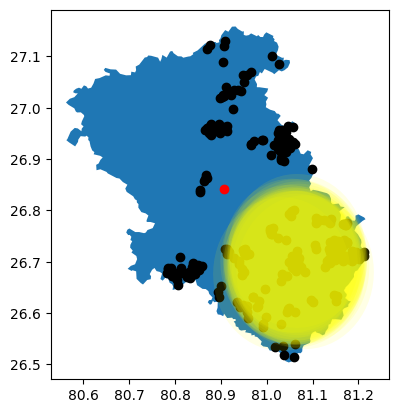

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

kiln_locations = []
for state in ["uttar_pradesh", "bihar", "west_bengal", "haryana", "punjab"]:
    kiln_locations.append(gpd.read_file(f"/home/patel_zeel/kiln_compass_24/final_data/labels/{state}.geojson").to_crs("EPSG:4326"))
all_kilns_gdf = pd.concat(kiln_locations, ignore_index=True)

center_coords = all_kilns_gdf[['center_lat', 'center_lon', 'max_lon', 'min_lon', 'max_lat', 'min_lat']].copy()
center_coords = gpd.GeoDataFrame(
    center_coords,
    geometry=gpd.points_from_xy(center_coords.center_lon, center_coords.center_lat),
    crs="EPSG:4326"
)

india_shape_file = gpd.read_file("/home/rishabh.mondal/Brick-Kilns-project/kiln_compass_24/raw_shapefiles/uttarpradesh_district.geojson") 
india_shape_file = india_shape_file[india_shape_file['district']=='Lucknow']

# Ensure both have the same CRS
print("Kiln CRS:", center_coords.crs)
print("Polygon CRS:", india_shape_file.crs)

# Perform spatial join to find kilns inside the polygon
kilns_in_gpd = gpd.sjoin(center_coords, india_shape_file, how='inner')
print("Number of kilns inside polygon:", kilns_in_gpd.shape[0])

fig, ax = plt.subplots()
india_shape_file.plot(ax = ax)
ax.scatter(kilns_in_gpd['center_lon'],kilns_in_gpd['center_lat'], color = 'black')

coords = india_shape_file.centroid
coords.x, coords.y
ax.scatter(coords.x, coords.y, color = 'red')
cond = (kilns_in_gpd['center_lon'] > 81) & (kilns_in_gpd['center_lon'] < 81.1) \
        & (kilns_in_gpd['center_lat'] > 26.675) & (kilns_in_gpd['center_lat'] < 26.725)
kilns_in_gpd = kilns_in_gpd[cond]
buffer = kilns_in_gpd.buffer(0.15)

buffer.plot(ax = ax , color = 'yellow', alpha = 0.1)

# ax.set_xlim(81,81.2)
# ax.set_ylim(26.6,26.9)

<Axes: >

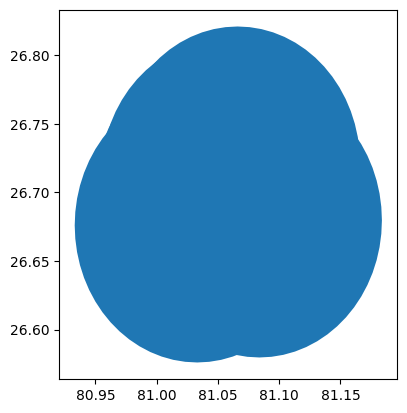

In [101]:
buffer.to_file('lucknow_kilns.geojson', driver = 'GeoJSON')
tmp = gpd.read_file('lucknow_kilns.geojson')
tmp.plot()